In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Set display options for pandas to show up to 50 rows and 500 columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

In [ ]:
def truncate(numero, cifras = 1):
    posiciones = pow(10.0, cifras)
    return math.trunc(posiciones * numero) / posiciones

In [ ]:
# Download the data files from GitHub
!wget https://github.com/JoserraSASG/TFM_Repository/raw/main/data/Oviedo-Pozuelo_04-06.xlsx
!wget https://github.com/JoserraSASG/TFM_Repository/raw/main/data/Pozuelo_plusminus.xlsx
!wget https://github.com/JoserraSASG/TFM_Repository/raw/main/data/Oviedo_plusminus.xlsx
!wget https://github.com/JoserraSASG/TFM_Repository/raw/main/data/Oviedo%20Div.%20Oro%20vs%20BM%20Pozuelo%20Div.%20Oro.xlsx

# Read the downloaded Excel files into pandas DataFrames
df = pd.read_excel("Oviedo-Pozuelo_04-06.xlsx")
df2 = pd.read_excel("Pozuelo_plusminus.xlsx")
df3 = pd.read_excel("Oviedo_plusminus.xlsx")
dfc = pd.read_excel("Oviedo Div. Oro vs BM Pozuelo Div. Oro.xlsx", sheet_name="PlusMinus")

--2023-09-05 07:50:45--  https://github.com/JoserraSASG/TFM_Repository/raw/main/Oviedo-Pozuelo_04-06.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoserraSASG/TFM_Repository/main/Oviedo-Pozuelo_04-06.xlsx [following]
--2023-09-05 07:50:45--  https://raw.githubusercontent.com/JoserraSASG/TFM_Repository/main/Oviedo-Pozuelo_04-06.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39915 (39K) [application/octet-stream]
Saving to: ‘Oviedo-Pozuelo_04-06.xlsx’

Oviedo-Pozuelo_04-0 100%[===================>]  38.98K  --.-KB/s    in 0.003s  

2023-09-05 07:50:45 (13.0 MB/s) - ‘Oviedo-Pozuelo_04-

#Visitor Team

**Replace the 1's with the victory probability values**

In [ ]:
# Split strings by commas and get unique values
lst = ','.join(df['Visitor Team']).split(',')
stripped_list = [string.strip() for string in lst]
visitor_strings = set(stripped_list)

# Create new columns in the dataframe
for string in visitor_strings:
    df[string] = 0

# Set values in the new columns
for i, row in df.iterrows():
    values = row['Visitor Team'].split(',')
    for value in values:
        value = value.strip()
        df.at[i, value] = 1

# Split strings by commas and get unique values
lst = ','.join(df['Home Team']).split(',')
stripped_list = [string.strip() for string in lst]
Home_strings = set(stripped_list)

# Create new columns in the dataframe
for string in Home_strings:
    df[string] = 0

# Set values in the new columns
for i, row in df.iterrows():
    values = row['Home Team'].split(',')
    for value in values:
        value = value.strip()
        df.at[i, value] = 1

In [ ]:
# Rename columns for 'Probabilidad_Ganar'
df2 = df2.rename(columns={'Probabilidad_Ganar': 'probability_visitor'})
df3 = df3.rename(columns={'Probabilidad_Ganar': 'probability_home'})

# Merge df with df2 and df3 using 'Start' and 'End' as keys
df = pd.merge(df, df2[['Start', 'End', 'probability_visitor']], on=['Start', 'End'], how='left')
df = pd.merge(df, df3[['Start', 'End', 'probability_home']], on=['Start', 'End'], how='left')

# Forward fill NaN values in probabilities
df['probability_visitor'] = df['probability_visitor'].fillna(method='ffill')
df['probability_home'] = df['probability_home'].fillna(method='ffill')

df

,Unnamed: 0,Game,Start,End,Period,Team,Event,TO_A,TO_B,Goal_A,Goal_B,GK_A,GK_B,Phase,Offense System,Defense System,Assist,Offense Player Number,Offense Player Name,Offense Player Position,Defense Player Number,Defense Player Name,Defense Player Position,Shooter Position,Shot Location,Home Team,Visitor Team,Possession,Important,Game System,Lanz_B,Lanz_A,Attacks_B,Attacks_A,%Eff_A,%Eff_B,%GK_A,%GK_B,%TO_A,%TO_B,%Lanz_A,%Lanz_B,Natalia Ortiz,Noelia DomÃ­nguez,Alba Jurado,Elena DÃ­az,LucÃ­a MartÃ­n,MarÃ­a Montoro,MarÃ­a Laguna,Daniela JerÃ³nimo,Khadija Lafsahi,MarÃ­a Rosell,Paula Moya,Davinia Sobrino,Maitane Larrayoz,Gemma Leal,Noelia Delfa,AINHOA ETXEBERRIA,JIMENA MERINO,CELIA ROJO,TERESA RODRÃ_x008d_GUEZ,CARMEN GARCIA,INES SUAREZ,AIDA PALICIO,MIRIAM CORTINA,BRENDA MAGALI,ARIADNA MOLINA,probability_visitor,probability_home
0,0,Oviedo Div. Oro vs BM Pozuelo Div. Oro,00:00:00,00:00:36,T1,Oviedo Div. Oro,FOUL_RECEIVE,0,0,0,0,0,0,OFFENSE_POSITIONAL,EQUALITY,6:0,,2,AIDA PALICIO,lb,8,Alba Jurado,rw,RIGHT_6M,,"INES SUAREZ, AIDA PALICIO, BRENDA MAGALI, TER...","Maitane Larrayoz, Khadija Lafsahi, Noelia Del...",1,False,NaN,0,0,0,1,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0,0,1,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,NaN,0.16
1,1,Oviedo Div. Oro vs BM Pozuelo Div. Oro,00:00:36,00:01:00,T1,Oviedo Div. Oro,LOST_BALL,1,0,0,0,0,0,OFFENSE_POSITIONAL,EQUALITY,6:0,,15,ARIADNA MOLINA,cb,8,Alba Jurado,rw,CENTER_9M,,"INES SUAREZ, AIDA PALICIO, BRENDA MAGALI, TER...","Maitane Larrayoz, Khadija Lafsahi, Noelia Del...",1,False,NaN,0,0,0,1,0.000000,NaN,0.000000,NaN,100.000000,NaN,0.000000,NaN,0,0,1,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,NaN,0.04
2,2,Oviedo Div. Oro vs BM Pozuelo Div. Oro,00:01:00,00:01:14,T1,BM Pozuelo Div. Oro,FOUL_RECEIVE,1,0,0,0,0,0,OFFENSE_POSITIONAL,EQUALITY,6:0,,9,Khadija Lafsahi,lp,10,TERESA RODRÃ_x008d_GUEZ,lp,,,"INES SUAREZ, AIDA PALICIO, BRENDA MAGALI, TER...","Maitane Larrayoz, Khadija Lafsahi, Noelia Del...",1,False,NaN,0,0,1,1,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0,0,1,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0.16,0.04
3,3,Oviedo Div. Oro vs BM Pozuelo Div. Oro,00:01:14,00:01:45,T1,BM Pozuelo Div. Oro,GOAL,1,0,0,1,0,0,OFFENSE_POSITIONAL,EQUALITY,6:0,,5,LucÃ­a MartÃ­n,rb,16,INES SUAREZ,gk,RIGHT_6M,9,"INES SUAREZ, AIDA PALICIO, BRENDA MAGALI, TER...","Maitane Larrayoz, Khadija Lafsahi, Noelia Del...",1,False,NaN,1,0,1,1,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0.56,0.04
4,4,Oviedo Div. Oro vs BM Pozuelo Div. Oro,00:01:45,00:02:04,T1,Oviedo Div. Oro,POST_OUT,1,0,0,1,0,0,OFFENSE_POSITIONAL,EQUALITY,6:0,,20,CARMEN GARCIA,rb,1,Maitane Larrayoz,gk,RIGHT_9M,10,"INES SUAREZ, AIDA PALICIO, BRENDA MAGALI, TER...","Maitane Larrayoz, Khadija Lafsahi, Noelia Del...",2,False,NaN,1,1,1,2,0.000000,100.000000,0.000000,0.000000,50.000000,0.000000,50.000000,100.000000,0,0,1,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0.56,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,168,Oviedo Div. Oro vs BM Pozuelo Div. Oro,01:06:29,01:06:55,T2,BM Pozuelo Div. Oro,SAVE,11,8,24,25,15,9,OFFENSE_POSITIONAL,SUPERIORITY-7vs6,6:0,,10,Daniela JerÃ³nimo,lb,16,INES SUAREZ,gk,CENTER_6M,6,"BRENDA MAGALI, AIDA PALICIO, CARMEN GARCIA, A...","Khadija Lafsahi, Noelia Delfa, Daniela JerÃ³n...",49,False,NaN,42,37,49,49,48.979592,51.020408,30.612245,18.367347,22.448980,16.326531,75.510204,85.714286,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0.48,0.62
171,169,Oviedo Div. Oro vs BM Pozuelo Div. Oro,01:06:55,01:07:15,T2,Oviedo Div. Oro,GOAL,11,8,25,25,15,9,FAST_BREAK,INFERIORITY-6vs7,6:0,INES SUAREZ,9,BRENDA MAGALI,lw,,,,LEFT_WING,9,"BRENDA MAGALI, AIDA PALICIO, CARMEN GARCIA, A...","Khadi

## Creating Plus/Minus WinProbability

### Attack Count

In [ ]:
# 1. Create a difference column for 'probability_visitor'
df['probability_visitor_diff'] = df['probability_visitor'].diff().fillna(0)

# 2. Cumulative count of attacks for each player
for col in visitor_strings:
    df[col + '_attacks'] = (df[col].shift() == 1) & (df['Attacks_B'] > df['Attacks_B'].shift())
    df[col + '_attacks'] = df[col + '_attacks'].cumsum()

for col in visitor_strings:
    # Create a cumulative difference column for each player
    df[col + '_diff_accumb'] = 0

    # Initialize the difference accumulator
    diff_accum = 0

    # Iterate over the DataFrame rows
    for i in range(len(df)):
        # If the player is on the field, accumulate the difference
        if df.loc[i, col] == 1:
            diff_accum += df.loc[i, 'probability_visitor_diff']

        df.loc[i, col + '_diff_accumb'] = diff_accum
        # Filter columns that end with '_diff_accum' and save them in a new DataFrame
list_diff_accum_b = df.filter(like='_diff_accumb')

### Defense Count

In [ ]:
# 1. Create a difference column for 'probability_home'
df['probability_home_diff'] = df['probability_home'].diff().fillna(0)

for col in visitor_strings:
    # Create a defensive cumulative difference column for each player
    df[col + '_diff_accum_defenseb'] = 0

    # Initialize the defensive difference accumulator
    diff_accum_defense = 0

    # Iterate over the DataFrame rows
    for i in range(len(df)):
        # If the player is on the field and there's a change in the opposite team's probability, update the accumulated difference
        if df.loc[i, col] == 1 and df.loc[i, 'probability_home_diff'] != 0:
            # Invert the sign because we want to subtract when it increases and add when it decreases
            diff_accum_defense -= df.loc[i, 'probability_home_diff']

        df.loc[i, col + '_diff_accum_defenseb'] = diff_accum_defense

# Filter columns that end with '_diff_accum_defenseb' and save them in a new DataFrame
list_diff_accum_defenseb = df.filter(like='_diff_accum_defenseb')

### Total

In [ ]:
# Create a column to store the accumulated sum of attacks and defenses for each player
for col in visitor_strings:
    # Sum of accumulated attack and defense differences
    df[col + '_total_diff_b'] = df[col + '_diff_accumb'] + df[col + '_diff_accum_defenseb']

list_total_diff_b = df.filter(like='_total_diff_b')

# Extract the last row of the DataFrame and filter by '_total_diff_b' columns
last_row = df.iloc[-1].filter(like='_total_diff_b')

# Sort columns by their values and extract the index (player names)
sorted_players = last_row.sort_values(ascending=False).index.tolist()

# Clean player names
definitive_list = [name.split('_')[0].encode('latin1').decode('utf-8') for name in sorted_players]

print(definitive_list)

['Lucía Martín', 'Elena Díaz', 'Gemma Leal', 'Davinia Sobrino', 'Daniela Jerónimo', 'Noelia Delfa', 'Khadija Lafsahi', 'María Laguna', 'Noelia Domínguez', 'Alba Jurado', 'Maitane Larrayoz', 'María Rosell', 'Natalia Ortiz', 'Paula Moya', 'María Montoro']


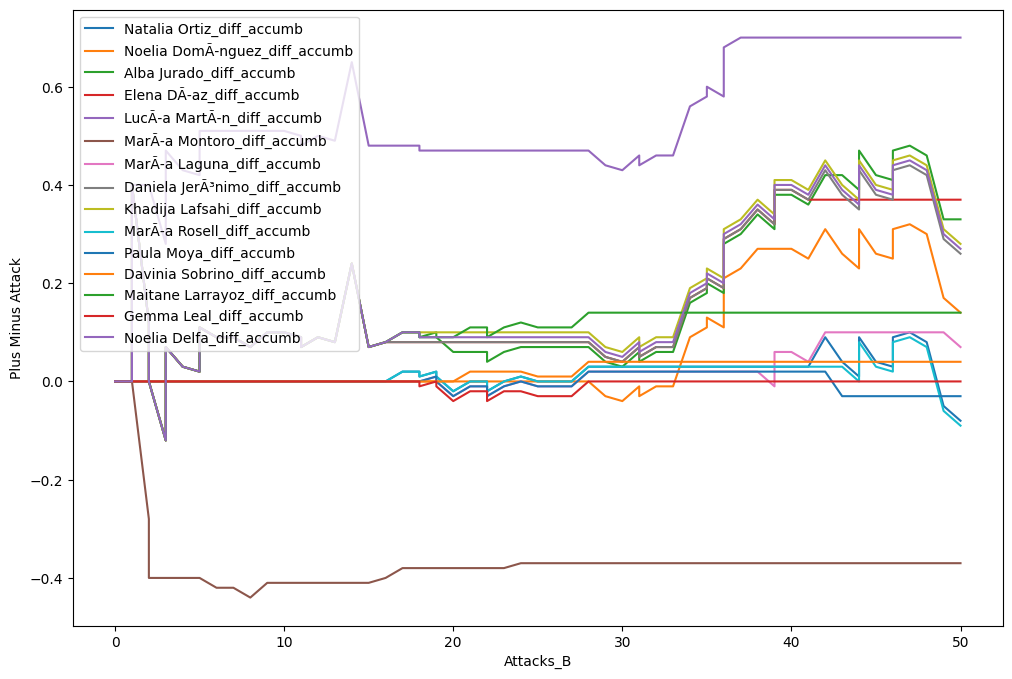

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(12,8))

# Iterate through each column of interest and plot
for col in list_diff_accum_b:
    plt.plot(df["Attacks_B"], df[col], label=col)

# Add a legend
plt.legend()

# Set axis names
plt.xlabel("Attacks_B")
plt.ylabel("Plus Minus Attack")

# Display the plot
plt.show()

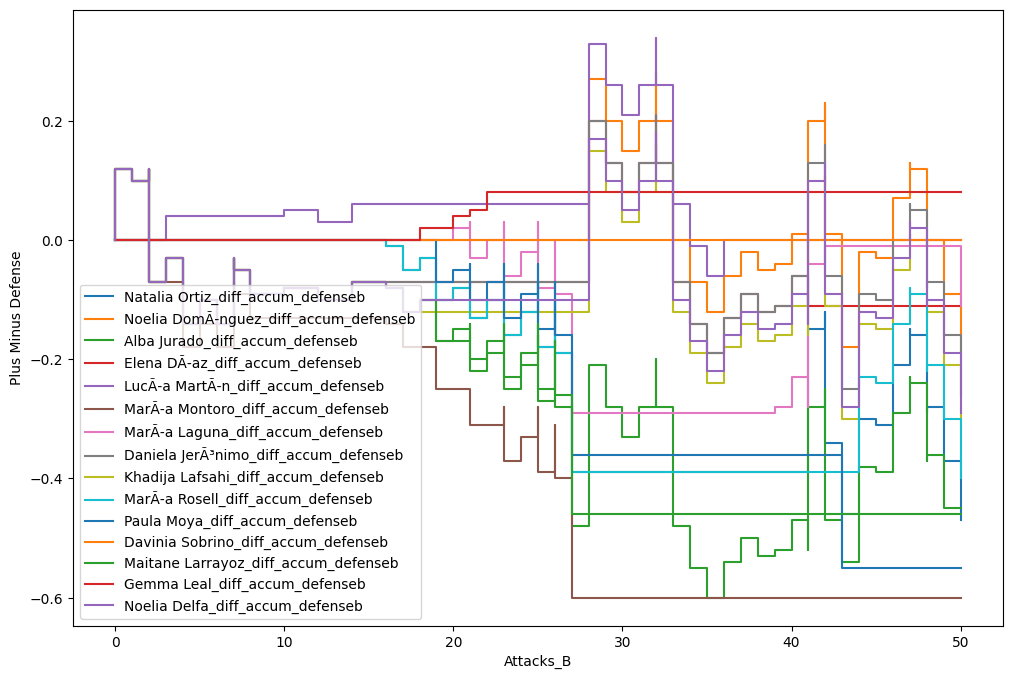

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(12,8))

# Iterate through each column of interest and plot
for col in list_diff_accum_defenseb:
    plt.plot(df["Attacks_B"], df[col], label=col)

# Add a legend
plt.legend()

# Set axis names
plt.xlabel("Attacks_B")
plt.ylabel("Plus Minus Defense")

# Display the plot
plt.show()


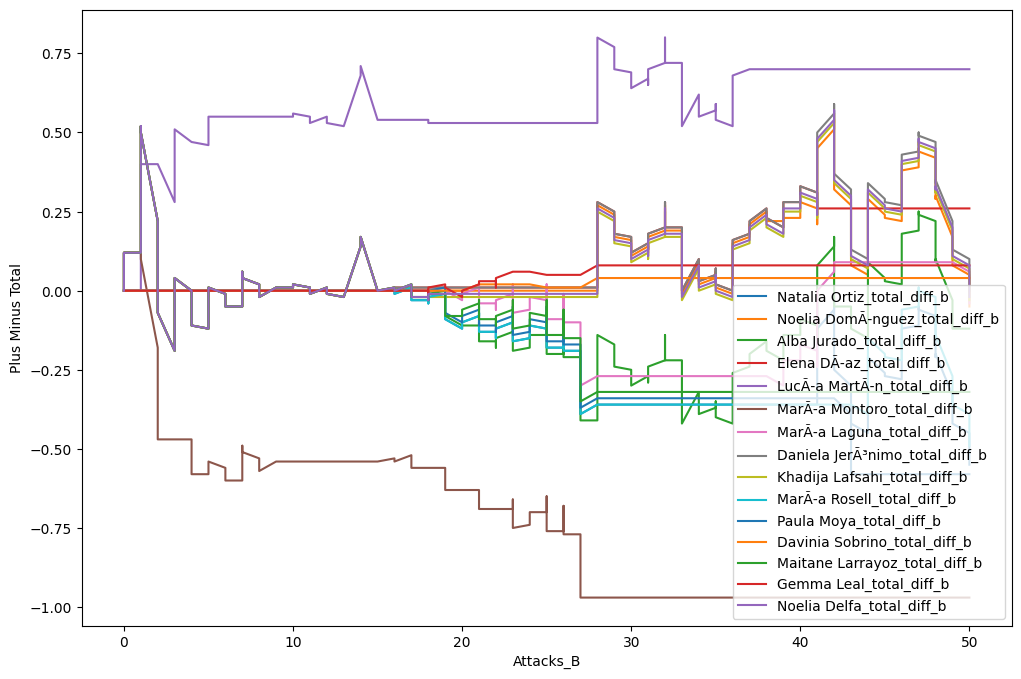

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(12,8))

# Iterate through each column of interest and plot
for col in list_total_diff_b:
    plt.plot(df["Attacks_B"], df[col], label=col)

# Add a legend
plt.legend()

# Set axis names
plt.xlabel("Attacks_B")
plt.ylabel("Plus Minus Total")

# Display the plot
plt.show()

## Exploration

In [ ]:
# Filter the DataFrame to consider only rows where Attacks_B is greater than or equal to 10
df_filtered = df[df['Attacks_B'] >= 10]

# Find the index of the row with the highest winning probability
index_max_prob = df_filtered['probability_visitor'].idxmax()

# Extract that row
row_max_prob = df_filtered.loc[index_max_prob]

# Find the columns (players) in that row that have a non-null or non-zero value
players_max_prob = row_max_prob[visitor_strings][row_max_prob[visitor_strings].notna() & (row_max_prob[visitor_strings] != 0)]

# Extract the names of the players
best_players = players_max_prob.index.tolist()

# Print the best combination of players and their highest winning probability
print(f"The best combination of players is: {best_players}")
print(f"Their highest winning probability was: {row_max_prob['probability_visitor']}")

# Print attack and statistics for Team B
print(f"This occurred during attack number: {row_max_prob['Attacks_B']}")
print(f"The statistics for Pozuelo at that time were:")
print(f"  %Eff_B: {row_max_prob['%Eff_B']}")
print(f"  %GK_B: {row_max_prob['%GK_B']}")
print(f"  %TO_B: {row_max_prob['%TO_B']}")

The best combination of players is: ['Natalia Ortiz', 'Noelia DomÃ\xadnguez', 'Alba Jurado', 'Daniela JerÃ³nimo', 'Khadija Lafsahi', 'MarÃ\xada Rosell', 'Noelia Delfa']
Their highest winning probability was: 0.63
This occurred during attack number: 47
The statistics for Pozuelo at that time were:
  %Eff_B: 53.19148936170212
  %GK_B: 19.14893617021277
  %TO_B: 17.02127659574468


<ipython-input-12-dba8cbe07c15>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  players_max_prob = row_max_prob[visitor_strings][row_max_prob[visitor_strings].notna() & (row_max_prob[visitor_strings] != 0)]
<ipython-input-12-dba8cbe07c15>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  players_max_prob = row_max_prob[visitor_strings][row_max_prob[visitor_strings].notna() & (row_max_prob[visitor_strings] != 0)]
<ipython-input-12-dba8cbe07c15>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  players_max_prob = row_max_prob[visitor_strings][row_max_prob[visitor_strings].notna() & (row_max_prob[visitor_strings] != 0)]


In [ ]:
ataque_39 = df[df['Attacks_B'] == 39]

ataque_39.head()

,Unnamed: 0,Game,Start,End,Period,Team,Event,TO_A,TO_B,Goal_A,Goal_B,GK_A,GK_B,Phase,Offense System,Defense System,Assist,Offense Player Number,Offense Player Name,Offense Player Position,Defense Player Number,Defense Player Name,Defense Player Position,Shooter Position,Shot Location,Home Team,Visitor Team,Possession,Important,Game System,Lanz_B,Lanz_A,Attacks_B,Attacks_A,%Eff_A,%Eff_B,%GK_A,%GK_B,%TO_A,%TO_B,%Lanz_A,%Lanz_B,Natalia Ortiz,Noelia DomÃ­nguez,Alba Jurado,Elena DÃ­az,LucÃ­a MartÃ­n,MarÃ­a Montoro,MarÃ­a Laguna,Daniela JerÃ³nimo,Khadija Lafsahi,MarÃ­a Rosell,Paula Moya,Davinia Sobrino,Maitane Larrayoz,Gemma Leal,Noelia Delfa,AINHOA ETXEBERRIA,JIMENA MERINO,CELIA ROJO,TERESA RODRÃ_x008d_GUEZ,CARMEN GARCIA,INES SUAREZ,AIDA PALICIO,MIRIAM CORTINA,BRENDA MAGALI,ARIADNA MOLINA,probability_visitor,probability_home,probability_visitor_diff,Natalia Ortiz_attacks,Noelia DomÃ­nguez_attacks,Alba Jurado_attacks,Elena DÃ­az_attacks,LucÃ­a MartÃ­n_attacks,MarÃ­a Montoro_attacks,MarÃ­a Laguna_attacks,Daniela JerÃ³nimo_attacks,Khadija Lafsahi_attacks,MarÃ­a Rosell_attacks,Paula Moya_attacks,Davinia Sobrino_attacks,Maitane Larrayoz_attacks,Gemma Leal_attacks,Noelia Delfa_attacks,Natalia Ortiz_diff_accumb,Noelia DomÃ­nguez_diff_accumb,Alba Jurado_diff_accumb,Elena DÃ­az_diff_accumb,LucÃ­a MartÃ­n_diff_accumb,MarÃ­a Montoro_diff_accumb,MarÃ­a Laguna_diff_accumb,Daniela JerÃ³nimo_diff_accumb,Khadija Lafsahi_diff_accumb,MarÃ­a Rosell_diff_accumb,Paula Moya_diff_accumb,Davinia Sobrino_diff_accumb,Maitane Larrayoz_diff_accumb,Gemma Leal_diff_accumb,Noelia Delfa_diff_accumb,probability_home_diff,Natalia Ortiz_diff_accum_defenseb,Noelia DomÃ­nguez_diff_accum_defenseb,Alba Jurado_diff_accum_defenseb,Elena DÃ­az_diff_accum_defenseb,LucÃ­a MartÃ­n_diff_accum_defenseb,MarÃ­a Montoro_diff_accum_defenseb,MarÃ­a Laguna_diff_accum_defenseb,Daniela JerÃ³nimo_diff_accum_defenseb,Khadija Lafsahi_diff_accum_defenseb,MarÃ­a Rosell_diff_accum_defenseb,Paula Moya_diff_accum_defenseb,Davinia Sobrino_diff_accum_defenseb,Maitane Larrayoz_diff_accum_defenseb,Gemma Leal_diff_accum_defenseb,Noelia Delfa_diff_accum_defenseb,Natalia Ortiz_total_diff_b,Noelia DomÃ­nguez_total_diff_b,Alba Jurado_total_diff_b,Elena DÃ­az_total_diff_b,LucÃ­a MartÃ­n_total_diff_b,MarÃ­a Montoro_total_diff_b,MarÃ­a Laguna_total_diff_b,Daniela JerÃ³nimo_total_diff_b,Khadija Lafsahi_total_diff_b,MarÃ­a Rosell_total_diff_b,Paula Moya_total_diff_b,Davinia Sobrino_total_diff_b,Maitane Larrayoz_total_diff_b,Gemma Leal_total_diff_b,Noelia Delfa_total_diff_b
132,130,Oviedo Div. Oro vs BM Pozuelo Div. Oro,00:50:55,00:51:23,T2,BM Pozuelo Div. Oro,FOUL_RECEIVE,8,7,20,21,12,6,OFFENSE_POSITIONAL,EQUALITY-5+1vs6,6:0,,10,Daniela JerÃ³nimo,lb,4,AINHOA ETXEBERRIA,lp,,,"INES SUAREZ, BRENDA MAGALI, AIDA PALICIO, MIR...","Khadija Lafsahi, Noelia Delfa, Alba Jurado, D...",39,False,NaN,32,30,39,39,51.282051,53.846154,30.769231,15.384615,20.512821,17.948718,76.923077,82.051282,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0.51,0.67,-0.03,12,11,38,27,15,20,8,27,29,12,9,0,28,2,30,0.03,0.27,0.31,0.32,0.7,-0.37,-0.01,0.32,0.34,0.03,0.02,0.04,0.14,0.0,0.33,0.00,-0.39,-0.05,-0.53,-0.12,-5.551115e-17,-0.6,-0.29,-0.12,-0.17,-0.39,-0.36,0,-0.46,0.08,-0.15,-0.36,0.22,-0.22,0.20,0.7,-0.97,-0.30,0.20,0.17,-0.36,-0.34,0.04,-0.32,0.08,0.18
133,131,Oviedo Div. Oro vs BM Pozuelo Div. Oro,00:51:23,00:51:35,T2,BM Pozuelo Div. Oro,GOAL,8,7,20,22,12,6,OFFENSE_POSITIONAL,EQUALITY-5+1vs6,6:0,,10,Daniela JerÃ³nimo,lb,16,INES SUAREZ,gk,CENTER_6M,1,"INES SUAREZ, BRENDA MAGALI, AIDA PALICIO, MIR...","Khadija Lafsahi, Noelia Delfa, Alba Jurado, D...",39,False,NaN,33,30,39,39,51.282051,56.410256,30.769231,15.384615,20.512821,17.948718,76.923077,84.615385,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0.58,0.67,0.07,12,11,38,27,15,20,8,27,29,12,9,0,28,2,30,0.03,0.27,0.38,0.39,0.7,-0.37,0.06,0.39,0.41,0.03,0.02,0.04,0.14,0.0,0.40,0.00,-0.39,-0.05,-0.53,-0.12,-5.551115e-17,-0.6,-0.29,-0.12,-0.17,-0.39,-0.36,0,-0.46,0.08,-0.15,-0.3

In [ ]:
# If 'Start' and 'End' are objects, proceed with conversion
if df['Start'].dtype == 'O':
    df['Start'] = pd.to_datetime(df['Start'].str.strip(), format='%H:%M:%S', errors='coerce')
    df['End'] = pd.to_datetime(df['End'].str.strip(), format='%H:%M:%S', errors='coerce')

    # Convert 'Start' and 'End' columns to timedelta
    df['Start'] = df['Start'].apply(lambda x: pd.NaT if pd.isnull(x) else pd.Timedelta(x - pd.Timestamp("1970-01-01")))
    df['End'] = df['End'].apply(lambda x: pd.NaT if pd.isnull(x) else pd.Timedelta(x - pd.Timestamp("1970-01-01")))

# Find the start time of attack 39
start_attack_39 = df.loc[df['Attacks_B'] == 39, 'Start'].min()
# Calculate two minutes earlier
two_minutes_before = start_attack_39 - pd.Timedelta(minutes=2)

# Find the attack that was happening two minutes before
attack_two_minutes_before = df.loc[df['Start'] <= two_minutes_before, 'Attacks_B'].max()

# Search for '2_MIN' events that occurred from the previous attack up to attack 39
expulsions = df[(df['Event'].str.strip() == '2_MIN') &
                       (df['Team'].str.strip() == 'BM Pozuelo Div. Oro') &
                       (df['Attacks_B'] >= attack_two_minutes_before) &
                       (df['Attacks_B'] <= 39)]

# Display the names of the expelled players
expelled_players = expulsions['Offense Player Name'].unique()
print(f"Expelled player(s): {expelled_players}")

Expelled player(s): [' LucÃ\xada MartÃ\xadn']


In [ ]:
from itertools import combinations

# Generating all possible combinations of 7 players
player_combinations = combinations(visitor_strings, 7)

max_prob = -1
best_combination = None

# Iterate through all possible combinations
for combo in player_combinations:
    # Get only the data where these 7 players are on the court
    df_filtered = df[df[list(combo)].all(axis=1)]

    # Check if there's data for this player combination
    if df_filtered.empty:
        continue

    # Get the corresponding accumulated probability columns
    prob_columns = [player+"_diff_accumb" for player in combo]

    # Calculate the average accumulated probability for this player combination
    _prob = df_filtered[prob_columns].mean().mean()

    # If this combination has a higher average accumulated probability, update max_prob and best_combination
    if _prob > max_prob:
        max_prob = _prob
        best_combination = combo

print("Best combination of players: ", best_combination)
print("Accumulative Score: ", max_prob)

Best combination of players:  ('Noelia DomÃ\xadnguez', 'Alba Jurado', 'Elena DÃ\xadaz', 'MarÃ\xada Laguna', 'Daniela JerÃ³nimo', 'Khadija Lafsahi', 'Noelia Delfa')
Accumulative Score:  0.3185714285714285


In [ ]:
import pandas as pd
from itertools import combinations

# Find all combinations of 7 players that played together
combinations_set = set()

for _, row in df.iterrows():
    playing_players = [player for player in visitor_strings if row[player] == 1]

    # Ensure there are at least 7 players on the field
    if len(playing_players) < 7:
        continue

    for combination in combinations(playing_players, 7):
        # Sort to ensure identical combinations in different orders are considered the same
        combinations_set.add(tuple(sorted(combination)))

# Now that we have all combinations, calculate the average probability for each combination
best_avg_prob = -1
best_combination = None

for combination in combinations_set:
    # Get the corresponding probability columns
    prob_columns = [player+"_diff_accumb" for player in combination]

    # Calculate the average probability for this player combination
    avg_prob = df[prob_columns].mean(axis=1).mean()

    # If this combination has a higher average probability, update best_avg_prob and best_combination
    if avg_prob > best_avg_prob:
        best_avg_prob = avg_prob
        best_combination = combination

print("Best combination of players: ", best_combination)
print("Maximum average winning probability: ", best_avg_prob)

Best combination of players:  ('Alba Jurado', 'Daniela JerÃ³nimo', 'Elena DÃ\xadaz', 'Khadija Lafsahi', 'LucÃ\xada MartÃ\xadn', 'Maitane Larrayoz', 'Noelia Delfa')
Maximum average winning probability:  0.21941224489795916


In [ ]:
columns_list = list_diff_accum_b.columns.tolist()
# Filter the data to only consider attacks after the tenth
df_filtered = df[df['Attacks_B'] > 10]

# Find the player with the highest and lowest winning probability after the tenth attack
max_prob_player = df[columns_list].max().idxmax()
max_prob_value = df_filtered[max_prob_player].max()
attack_number_max = df_filtered[df_filtered[max_prob_player] == max_prob_value]['Attacks_B'].values[0]

min_prob_player = df_filtered[columns_list].min().idxmin()
min_prob_value = df_filtered[min_prob_player].min()
attack_number_min = df_filtered[df_filtered[min_prob_player] == min_prob_value]['Attacks_B'].values[0]

print(f"The player with the highest winning Score after the tenth attack is: {max_prob_player} in attack number {attack_number_max} with a probability of {max_prob_value}")
print(f"The player with the lowest winning Score after the tenth attack is: {min_prob_player} in attack number {attack_number_min} with a probability of {min_prob_value}")

# Find the player with the highest and lowest winning probability overall
max_prob_player_total = df[columns_list].mean().idxmax()
max_prob_value_total = df[max_prob_player_total].mean()

min_prob_player_total = df[columns_list].mean().idxmin()
min_prob_value_total = df[min_prob_player_total].mean()

print(f"The player with the highest overall Score is: {max_prob_player_total} with an average probability of {max_prob_value_total}")
print(f"The player with the lowest overall Score is: {min_prob_player_total} with an average probability of {min_prob_value_total}")

# Search for another player with the lowest probability after attack 10 that's greater than 0
df_filtered_nonzero = df_filtered[columns_list].replace(0, np.nan)
min_prob_player_nonzero = df_filtered_nonzero.min().idxmin()
min_prob_value_nonzero = df_filtered_nonzero[min_prob_player_nonzero].min()
attack_number_min_nonzero = df_filtered[df_filtered[min_prob_player_nonzero] == min_prob_value_nonzero]['Attacks_B'].values[0]

print(f"Another player with the lowest Score after the tenth attack that's greater than 0 is: {min_prob_player_nonzero} in attack number {attack_number_min_nonzero} with a probability of {min_prob_value_nonzero}")

# Search for another player with the lowest average probability that's greater than 0
data_nonzero = df[columns_list].replace(0, np.nan)
min_prob_player_total_nonzero = data_nonzero.mean().idxmin()
min_prob_value_total_nonzero = data_nonzero[min_prob_player_total_nonzero].mean()

print(f"Another player with the lowest Score that's greater than 0 is: {min_prob_player_total_nonzero} with an average probability of {min_prob_value_total_nonzero}")

The player with the highest winning Score after the tenth attack is: LucÃ­a MartÃ­n_diff_accumb in attack number 37 with a probability of 0.7
The player with the lowest winning Score after the tenth attack is: MarÃ­a Montoro_diff_accumb in attack number 11 with a probability of -0.41000000000000003
The player with the highest overall Score is: LucÃ­a MartÃ­n_diff_accumb with an average probability of 0.5366857142857144
The player with the lowest overall Score is: MarÃ­a Montoro_diff_accumb with an average probability of -0.3708571428571427
Another player with the lowest Score after the tenth attack that's greater than 0 is: MarÃ­a Montoro_diff_accumb in attack number 11 with a probability of -0.41000000000000003
Another player with the lowest Score that's greater than 0 is: MarÃ­a Montoro_diff_accumb with an average probability of -0.3817647058823528


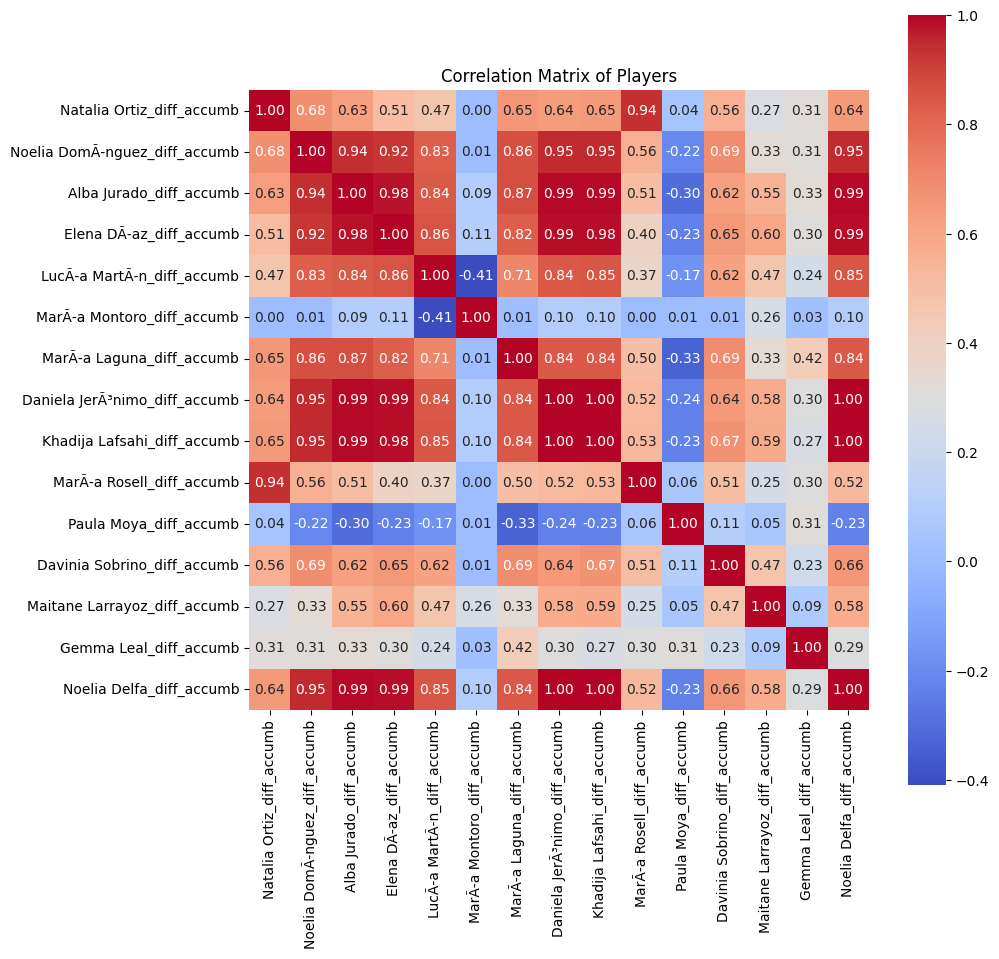

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the columns of interest
df_selected = df[columns_list]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix with a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Players')
plt.show()

In [ ]:
# First, split the dataframe into two: one for when the team is at a disadvantage and another when it's at an advantage
df['Disadvantage'] = df['Goal_A'] < df['Goal_B']
df['Advantage'] = df['Goal_A'] > df['Goal_B']

df_disadvantage = df[df['Disadvantage'] == True]
df_advantage = df[df['Advantage'] == True]

# Calculate the average probability for each player when the team is at a disadvantage
print("Average probability for each player when the team is at a disadvantage:")
print(df_disadvantage[columns_list].mean())

# Calculate the average probability for each player when the team is at an advantage
print("Average probability for each player when the team is at an advantage:")
print(df_advantage[columns_list].mean())

# Player with the highest winning probability when the team is at a disadvantage
max_prob_player_disadvantage = df_disadvantage[columns_list].mean().idxmax()
print(f'The player with the highest average winning probability when the team is at a disadvantage is: {max_prob_player_disadvantage}')

# Player with the highest winning probability when the team is at an advantage
max_prob_player_advantage = df_advantage[columns_list].mean().idxmax()
print(f'The player with the highest average winning probability when the team is at an advantage is: {max_prob_player_advantage}')

Average probability for each player when the team is at a disadvantage:
Natalia Ortiz_diff_accumb        0.042281
Noelia DomÃ­nguez_diff_accumb    0.197544
Alba Jurado_diff_accumb          0.325614
Elena DÃ­az_diff_accumb          0.294737
LucÃ­a MartÃ­n_diff_accumb       0.635439
MarÃ­a Montoro_diff_accumb      -0.364211
MarÃ­a Laguna_diff_accumb        0.052807
Daniela JerÃ³nimo_diff_accumb    0.315789
Khadija Lafsahi_diff_accumb      0.330175
MarÃ­a Rosell_diff_accumb        0.032632
Paula Moya_diff_accumb          -0.002632
Davinia Sobrino_diff_accumb      0.028070
Maitane Larrayoz_diff_accumb     0.137895
Gemma Leal_diff_accumb          -0.000175
Noelia Delfa_diff_accumb         0.322982
dtype: float64
Average probability for each player when the team is at an advantage:
Natalia Ortiz_diff_accumb        0.015116
Noelia DomÃ­nguez_diff_accumb    0.008837
Alba Jurado_diff_accumb          0.085349
Elena DÃ­az_diff_accumb          0.093488
LucÃ­a MartÃ­n_diff_accumb       0.486279
Mar

In [ ]:
# Calculate the average probabilities in both scenarios
mean_prob_both_scenarios = (df_disadvantage[columns_list].mean() + df_advantage[columns_list].mean()) / 2

# Sort the players by this average
sorted_players = mean_prob_both_scenarios.sort_values(ascending=False)

# Convert the result into a list
sorted_players_list = sorted_players.index.tolist()

print("Players sorted from highest to lowest average probability, along with their average probability:")
for player, prob in sorted_players.items():
    print(f"{player}: {prob}")

Players sorted from highest to lowest average probability, along with their average probability:
LucÃ­a MartÃ­n_diff_accumb: 0.560858833129335
Khadija Lafsahi_diff_accumb: 0.21939004487964092
Noelia Delfa_diff_accumb: 0.2117237862097103
Alba Jurado_diff_accumb: 0.20548143614851075
Daniela JerÃ³nimo_diff_accumb: 0.20335985312117494
Elena DÃ­az_diff_accumb: 0.1941126070991432
Maitane Larrayoz_diff_accumb: 0.1305752753977968
Noelia DomÃ­nguez_diff_accumb: 0.1031905344757242
MarÃ­a Laguna_diff_accumb: 0.031054671562627496
Natalia Ortiz_diff_accumb: 0.028698490412076706
Davinia Sobrino_diff_accumb: 0.02659322725418197
MarÃ­a Rosell_diff_accumb: 0.023757649938800512
Paula Moya_diff_accumb: 0.0021725826193390472
Gemma Leal_diff_accumb: -0.0038086495308037567
MarÃ­a Montoro_diff_accumb: -0.3707099143206855


## Correlation with another methods

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Filter the dataframe dfc
dfc = dfc[dfc['Team'] == "BM Pozuelo Div. Oro"]

# Rankings based on PMI, PMB, and PMBDef
pmi_ranking = dfc.sort_values(by='PMI', ascending=False)['Player1'].tolist()
pmb_ranking = dfc.sort_values(by='PMB', ascending=False)['Player1'].tolist()

# In df, identify players with the suffix _diff_accumb in the last row
prob_ranking = df.iloc[-1].filter(like='_total_diff_b').sort_values(ascending=False).index.tolist()

# Decode and clean names in prob_ranking to match the names in dfc
prob_ranking_cleaned = [name.split('_')[0].encode('latin1').decode('utf-8') for name in prob_ranking]

# Function to calculate correlations
def spearman_ranking_corr_adjusted(list1, list2):
    common_items = set(list1).intersection(set(list2))
    rank1 = [list1.index(item) for item in common_items]
    rank2 = [list2.index(item) for item in common_items]
    coef, _ = spearmanr(rank1, rank2)
    return coef

# Calculate correlations
corr_prob_pmi = spearman_ranking_corr_adjusted(prob_ranking_cleaned, pmi_ranking)
corr_prob_pmb = spearman_ranking_corr_adjusted(prob_ranking_cleaned, pmb_ranking)
corr_pmi_pmb = spearman_ranking_corr_adjusted(pmi_ranking, pmb_ranking)

# Display results
print("Ranking based on accumulated difference:\n", "\n".join(prob_ranking_cleaned))
print("\nRanking based on PMI:\n", "\n".join(pmi_ranking))
print("\nRanking based on PMB:\n", "\n".join(pmb_ranking))
print("\nCorrelation between accumulated difference and PMI:", corr_prob_pmi)
print("Correlation between accumulated difference and PMB:", corr_prob_pmb)
print("Correlation between PMI and PMB:", corr_pmi_pmb)

Ranking based on accumulated difference:
 Lucía Martín
Elena Díaz
Gemma Leal
Davinia Sobrino
Daniela Jerónimo
Noelia Delfa
Khadija Lafsahi
María Laguna
Noelia Domínguez
Alba Jurado
Maitane Larrayoz
María Rosell
Natalia Ortiz
Paula Moya
María Montoro

Ranking based on PMI:
 Elena Díaz
Lucía Martín
Gemma Leal
Davinia Sobrino
Daniela Jerónimo
Maitane Larrayoz
Noelia Delfa
Khadija Lafsahi
Alba Jurado
María Laguna
Noelia Domínguez
María Montoro
María Rosell
Paula Moya
Natalia Ortiz

Ranking based on PMB:
 Elena Díaz
Lucía Martín
Gemma Leal
Davinia Sobrino
Daniela Jerónimo
Maitane Larrayoz
María Laguna
Noelia Delfa
Khadija Lafsahi
Alba Jurado
María Montoro
Noelia Domínguez
Paula Moya
María Rosell
Natalia Ortiz

Correlation between accumulated difference and PMI: 0.907142857142857
Correlation between accumulated difference and PMB: 0.8749999999999999
Correlation between PMI and PMB: 0.9714285714285713


# Home Team

## Creating Plus/Minus WinProbability

### Attack Count

In [ ]:
# 1. Cumulative attack count for each player
for col in Home_strings:
    df[col + '_attacks'] = (df[col].shift() == 1) & (df['Attacks_A'] > df['Attacks_A'].shift())
    df[col + '_attacks'] = df[col + '_attacks'].cumsum()

for col in Home_strings:
    # Create a column for accumulated differences for each player
    df[col + '_diff_accuma'] = 0

    # Initialize the difference accumulator
    diff_accuma = 0

    # Iterate over the DataFrame's rows
    for i in range(len(df)):
        # If the player is on the court, accumulate the difference
        if df.loc[i, col] == 1:
            diff_accuma += df.loc[i, 'probability_home_diff']

        df.loc[i, col + '_diff_accuma'] = diff_accuma
    # Filter columns ending with '_diff_accum' and store them in a new DataFrame
list_diff_accum_a = df.filter(like='_diff_accuma')

### Defense Count

In [ ]:
for col in Home_strings:
    # Create a column for defensive accumulated differences for each player
    df[col + '_diff_accum_defensea'] = 0

    # Initialize the defensive difference accumulator
    diff_accum_defensea = 0

    # Iterate over the DataFrame's rows
    for i in range(len(df)):
        # If the player is on the court and there's a change in the opposite team's probability, update the accumulated difference
        if df.loc[i, col] == 1 and df.loc[i, 'probability_visitor_diff'] != 0:
            # Reverse the sign because we want to subtract when it increases and add when it decreases
            diff_accum_defensea -= df.loc[i, 'probability_visitor_diff']

        df.loc[i, col + '_diff_accum_defensea'] = diff_accum_defensea

# Filter columns ending with '_diff_accum_defensea' and store them in a new DataFrame
list_diff_accum_defensea = df.filter(like='_diff_accum_defensea')

### Total

In [ ]:
# 2. Create a column to store the accumulated sum of attacks and defenses for each local team player
for col in Home_strings:
    df[col + '_total_diff_a'] = df[col + '_diff_accuma'] + df[col + '_diff_accum_defensea']

list_total_diff_b_home = df.filter(like='_total_diff_a')

# 3. Extract the last row from the DataFrame and filter by the columns '_total_diff_b'
last_row_home = df.iloc[-1].filter(like='_total_diff_a')

# 4. Sort players by their total differential value
sorted_players_home = last_row_home.sort_values(ascending=False).index.tolist()

# 5. Clean player names and display
definitive_list_home = [name.split('_')[0] for name in sorted_players_home]

print(definitive_list_home)

['TERESA RODRÃ', 'CARMEN GARCIA', 'CELIA ROJO', 'ARIADNA MOLINA', 'INES SUAREZ', 'BRENDA MAGALI', 'AIDA PALICIO', 'MIRIAM CORTINA', 'AINHOA ETXEBERRIA', 'JIMENA MERINO']


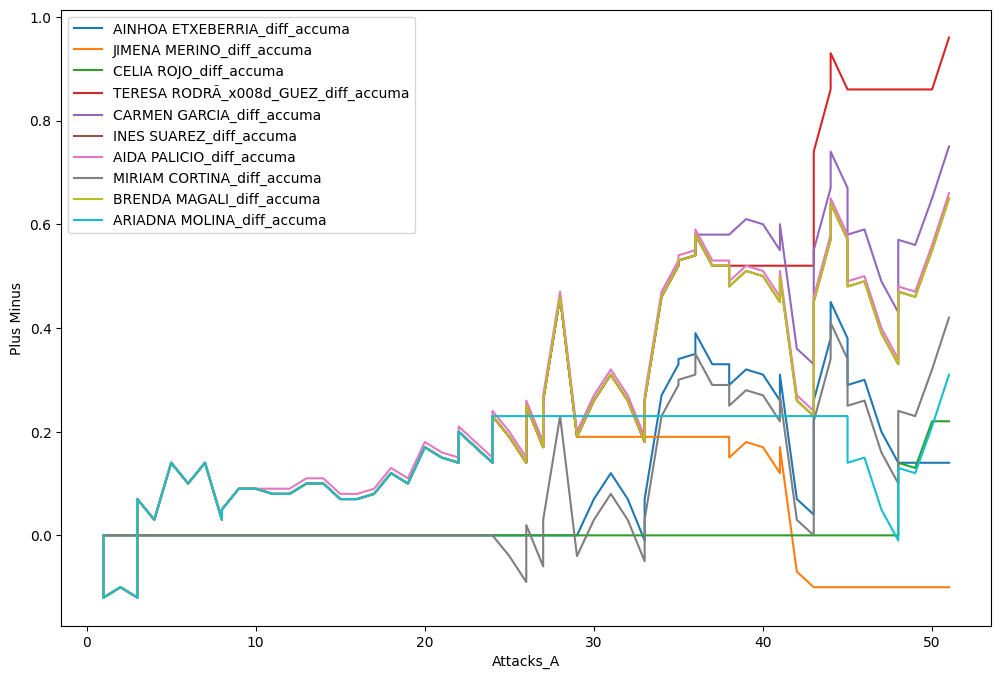

In [ ]:
import matplotlib.pyplot as plt

# Automatically get columns ending in '_prob_avg'
prob_avg_columns = [col for col in df.columns if col.endswith("_diff_accuma")]

# Create a new figure
plt.figure(figsize=(12,8))

# Loop through each column of interest and create a plot
for col in prob_avg_columns:
    plt.plot(df["Attacks_A"], df[col], label=col)

# Add a legend
plt.legend()

# Set axis names
plt.xlabel("Attacks_A")
plt.ylabel("Plus Minus")

# Display the plot
plt.show()

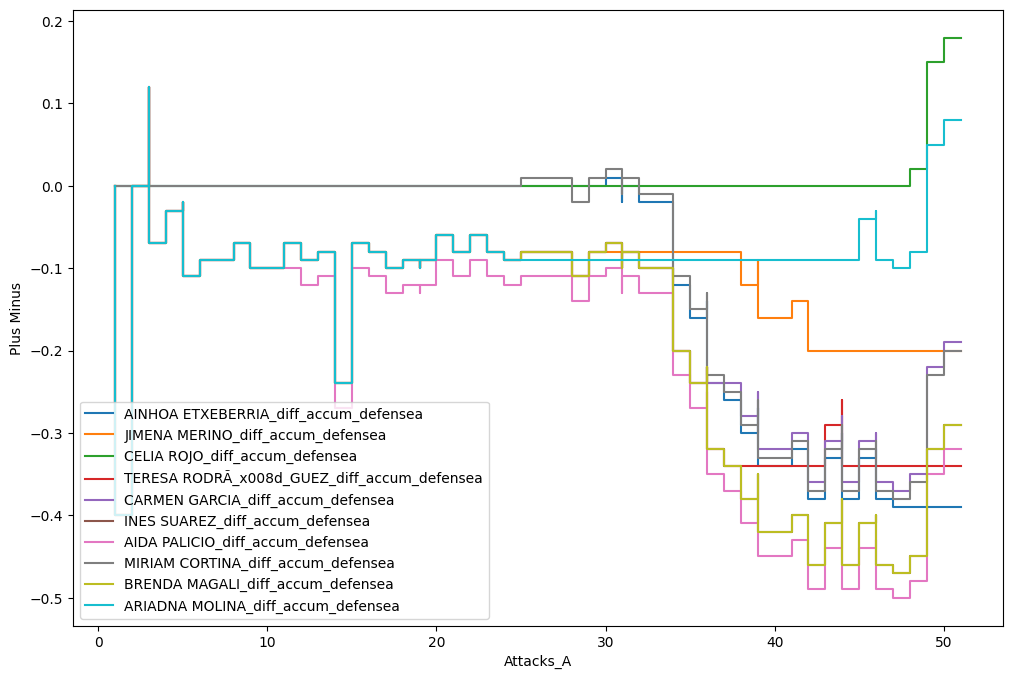

In [ ]:
import matplotlib.pyplot as plt

# Automatically get columns ending in '_prob_avg'
prob_avg_columns = [col for col in df.columns if col.endswith("_diff_accum_defensea")]

# Create a new figure
plt.figure(figsize=(12,8))

# Loop through each column of interest and create a plot
for col in prob_avg_columns:
    plt.plot(df["Attacks_A"], df[col], label=col)

# Add a legend
plt.legend()

# Set axis names
plt.xlabel("Attacks_A")
plt.ylabel("Plus Minus")

# Display the plot
plt.show()

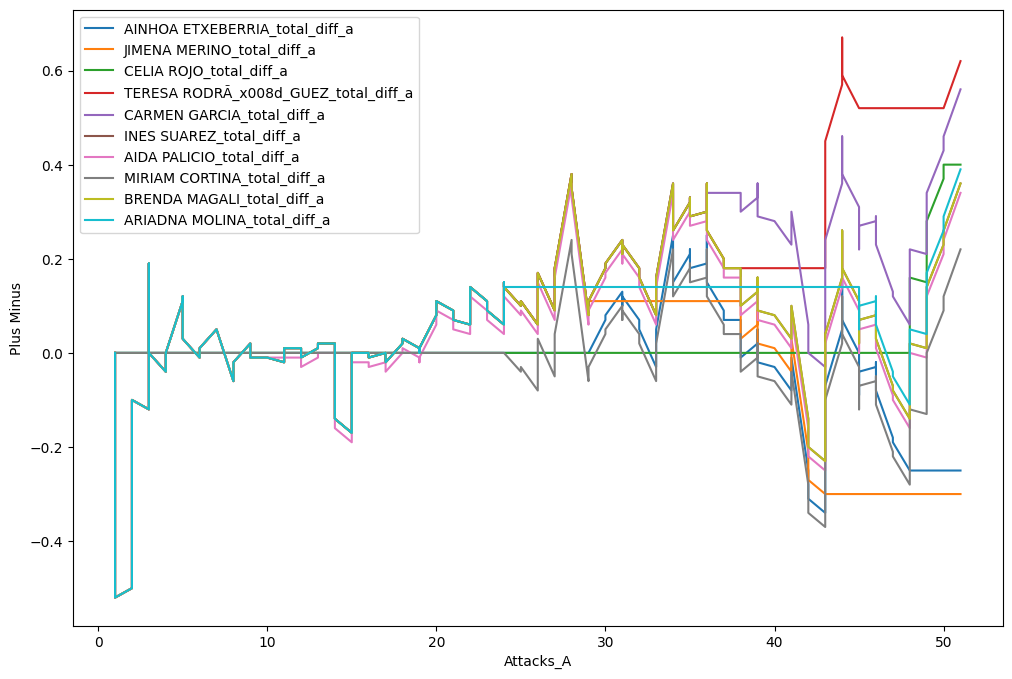

In [ ]:
import matplotlib.pyplot as plt

# Automatically get columns ending in '_prob_avg'
prob_avg_columns = [col for col in df.columns if col.endswith("_total_diff_a")]

# Create a new figure
plt.figure(figsize=(12,8))

# Loop through each column of interest and create a plot
for col in prob_avg_columns:
    plt.plot(df["Attacks_A"], df[col], label=col)

# Add a legend
plt.legend()

# Set axis names
plt.xlabel("Attacks_A")
plt.ylabel("Plus Minus")

# Display the plot
plt.show()

## Exploration

In [ ]:
import itertools

# Define player columns
players_cols = list(Home_strings)

# Create all possible combinations of 7 players
combinations = list(itertools.combinations(players_cols, 7))

# Initialize the maximum win probability and the best combination
max_prob = 0
best_combination = None

# For each combination, calculate the average win probability starting from attack 10
for combination in combinations:
    avg_prob = df.loc[df['Attacks_A'] >= 10, list(combination)].mean(axis=1).mean()
    if avg_prob > max_prob:
        max_prob = avg_prob
        best_combination = combination

# Print the best combination and its win probability
print(f"The best player combination is: {best_combination}")
print(f"Their average win probability starting from attack 10 is: {max_prob}")

The best player combination is: ('JIMENA MERINO', 'TERESA RODRÃ_x008d_GUEZ', 'CARMEN GARCIA', 'INES SUAREZ', 'AIDA PALICIO', 'MIRIAM CORTINA', 'BRENDA MAGALI')
Their average win probability starting from attack 10 is: 0.8420523138832997


In [ ]:
# Filter the DataFrame to consider only rows where Attacks_B is greater or equal to 10
df_filtered = df[df['Attacks_A'] >= 10]

# Find the row index with the highest win probability
index_max_prob = df_filtered['probability_home'].idxmax()

# Extract that row
row_max_prob = df_filtered.loc[index_max_prob]

# Find columns (players) in that row that have a non-null or non-zero value
players_max_prob = row_max_prob[players_cols][row_max_prob[players_cols].notna() & (row_max_prob[players_cols] != 0)]

# Extract player names
best_players = players_max_prob.index.tolist()

# Print the best player combination and their maximum win probability
print(f"The best player combination is: {best_players}")
print(f"Their maximum win probability was: {row_max_prob['probability_home']}")

# Print the attack and the statistics of team B
print(f"This occurred during attack number: {row_max_prob['Attacks_A']}")
print(f"The local team's statistics at that moment were:")
print(f"  %Eff_A: {row_max_prob['%Eff_A']}")
print(f"  %GK_A: {row_max_prob['%GK_A']}")
print(f"  %TO_A: {row_max_prob['%TO_A']}")

The best player combination is: ['TERESA RODRÃ_x008d_GUEZ', 'CARMEN GARCIA', 'INES SUAREZ', 'AIDA PALICIO', 'MIRIAM CORTINA', 'BRENDA MAGALI', 'ARIADNA MOLINA']
Their maximum win probability was: 0.81
This occurred during attack number: 51
The local team's statistics at that moment were:
  %Eff_A: 50.98039215686274
  %GK_A: 31.37254901960784
  %TO_A: 21.56862745098039


In [ ]:
from itertools import combinations

# Columns representing the players
players_columns = list(Home_strings)

# All possible combinations of 7 players
player_combinations = combinations(players_columns, 7)

max_prob = -1
best_combination = None

# Loop through all possible combinations
for combo in player_combinations:
    # Get only the data where these 7 players are on the court
    df_filtered = df[df[list(combo)].all(axis=1)]

    # Check if there's data for this player combination
    if df_filtered.empty:
        continue

    # Get the corresponding probability columns
    prob_columns = [player+"_diff_accuma" for player in combo]

    # Calculate the average probability for this player combination
    _prob = df_filtered[prob_columns].mean().mean()

    # If this combination has a higher average probability, update max_avg_prob and best_combination
    if _prob > max_prob:
        max_prob = _prob
        best_combination = combo

print("Best combination of players: ", best_combination)
print("Maximum average winning probability: ", max_prob)

Best combination of players:  ('TERESA RODRÃ_x008d_GUEZ', 'CARMEN GARCIA', 'INES SUAREZ', 'AIDA PALICIO', 'MIRIAM CORTINA', 'BRENDA MAGALI', 'ARIADNA MOLINA')
Maximum average winning probability:  0.6285714285714287


In [ ]:
import pandas as pd
from itertools import combinations

# Columns representing the players
players_columns = list(Home_strings)

# Find all combinations of 7 players who have played together
combinations_set = set()

for _, row in df.iterrows():
    playing_players = [player for player in players_columns if row[player] == 1]

    # Ensure there are at least 7 players on the court
    if len(playing_players) < 7:
        continue

    for combination in combinations(playing_players, 7):
        # Sort to ensure identical combinations in different order are considered the same
        combinations_set.add(tuple(sorted(combination)))

# Now that we have all combinations, calculate the average probability for each combination
best_prob = -1
best_combination = None

for combination in combinations_set:
    # Get the corresponding probability columns
    prob_columns = [player+"_diff_accuma" for player in combination]

    # Calculate the average probability for this player combination
    _prob = df[prob_columns].mean(axis=1).mean()

    # If this combination has a higher average probability, update best_prob and best_combination
    if _prob > best_prob:
        best_prob = _prob
        best_combination = combination

print("Best combination of players: ", best_combination)
print("Maximum winning probability: ", best_prob)

Best combination of players:  ('AIDA PALICIO', 'AINHOA ETXEBERRIA', 'ARIADNA MOLINA', 'BRENDA MAGALI', 'CARMEN GARCIA', 'INES SUAREZ', 'TERESA RODRÃ_x008d_GUEZ')
Maximum winning probability:  0.2376734693877551


In [ ]:
# Set the columns of interest
prob_columns = [col for col in df.columns if col.endswith("_diff_accuma")]

# Filter the data to only consider attacks after the tenth
df_filtered = df[df['Attacks_A'] > 10]

# Find the player with the highest and lowest win probability after the tenth attack
max_prob_player = df_filtered[prob_columns].max().idxmax()
max_prob_value = df_filtered[max_prob_player].max()
attack_number_max = df_filtered[df_filtered[max_prob_player] == max_prob_value]['Attacks_A'].values[0]

min_prob_player = df_filtered[prob_columns].min().idxmin()
min_prob_value = df_filtered[min_prob_player].min()
attack_number_min = df_filtered[df_filtered[min_prob_player] == min_prob_value]['Attacks_A'].values[0]

print(f"The player with the highest score after the tenth attack is: {max_prob_player} in attack number {attack_number_max} with a probability of {max_prob_value}")
print(f"The player with the lowest score after the tenth attack is: {min_prob_player} in attack number {attack_number_min} with a probability of {min_prob_value}")

# Find the player with the highest and lowest win probability overall
max_prob_player_total = df[prob_columns].mean().idxmax()
max_prob_value_total = df[max_prob_player_total].mean()

min_prob_player_total = df[prob_columns].mean().idxmin()
min_prob_value_total = df[min_prob_player_total].mean()

print(f"The player with the best overall score is: {max_prob_player_total} with an average probability of {max_prob_value_total}")
print(f"The player with the worst overall score is: {min_prob_player_total} with an average probability of {min_prob_value_total}")

# Search for another player with a probability after attack 10 that is greater than 0
df_filtered_nonzero = df_filtered[prob_avg_columns].replace(0, np.nan)
min_prob_player_nonzero = df_filtered_nonzero.min().idxmin()
min_prob_value_nonzero = df_filtered_nonzero[min_prob_player_nonzero].min()
attack_number_min_nonzero = df_filtered[df_filtered[min_prob_player_nonzero] == min_prob_value_nonzero]['Attacks_A'].values[0]

print(f"Another player with a score greater than 0 after the tenth attack is: {min_prob_player_nonzero} in attack number {attack_number_min_nonzero} with a probability of {min_prob_value_nonzero}")

# Search for another player with a probability always greater than 0
data_nonzero = df[prob_avg_columns].replace(0, np.nan)
min_prob_player_total_nonzero = data_nonzero.mean().idxmin()
min_prob_value_total_nonzero = data_nonzero[min_prob_player_total_nonzero].mean()

print(f"Another player with an overall score greater than 0 is: {min_prob_player_total_nonzero} with an average probability of {min_prob_value_total_nonzero}")

The player with the highest score after the tenth attack is: TERESA RODRÃ_x008d_GUEZ_diff_accuma in attack number 51 with a probability of 0.9600000000000001
The player with the lowest score after the tenth attack is: JIMENA MERINO_diff_accuma in attack number 43 with a probability of -0.10000000000000003
The player with the best overall score is: TERESA RODRÃ_x008d_GUEZ_diff_accuma with an average probability of 0.3342857142857143
The player with the worst overall score is: CELIA ROJO_diff_accuma with an average probability of 0.008228571428571429
Another player with a score greater than 0 after the tenth attack is: MIRIAM CORTINA_total_diff_a in attack number 43 with a probability of -0.37
Another player with an overall score greater than 0 is: AINHOA ETXEBERRIA_total_diff_a with an average probability of -0.025540540540540523


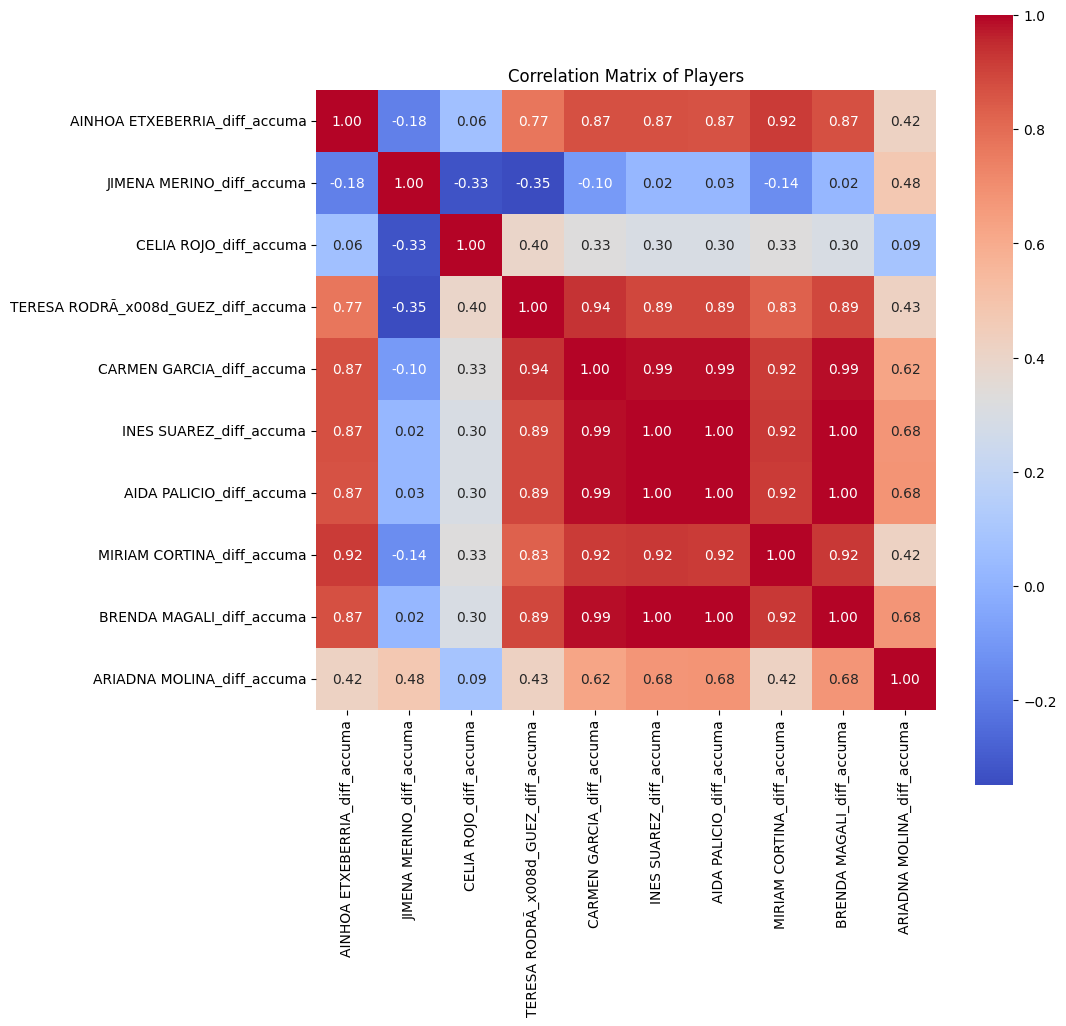

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns that represent the average win probability of the players
prob_columns = [col for col in df.columns if col.endswith("_diff_accuma")]

# Select only the columns of interest
df_selected = df[prob_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Players')
plt.show()

In [ ]:
# We separate the dataframe into two: one for when the team is at a disadvantage and another for when they have the advantage

df['Disadvantage'] = df['Goal_B'] < df['Goal_A']
df['Advantage'] = df['Goal_B'] > df['Goal_A']

df_disadvantage = df[df['Disadvantage'] == True]
df_advantage = df[df['Advantage'] == True]

# List of columns that represent the average win probability of the players
prob_columns = [col for col in df.columns if col.endswith("_diff_accuma")]

# Calculate the average probability of each player when the team is at a disadvantage
print("Average probability of each player when the team is at a disadvantage:")
print(df_disadvantage[prob_columns].mean())

# Calculate the average probability of each player when the team has the advantage
print("Average probability of each player when the team has the advantage:")
print(df_advantage[prob_columns].mean())

# Player with the highest win probability when the team is at a disadvantage
max_prob_player_disadvantage = df_disadvantage[prob_columns].mean().idxmax()
print(f'The player with the highest average win probability when the team is at a disadvantage is: {max_prob_player_disadvantage}')

# Player with the highest win probability when the team has the advantage
max_prob_player_advantage = df_advantage[prob_columns].mean().idxmax()
print(f'The player with the highest average win probability when the team has the advantage is: {max_prob_player_advantage}')

Average probability of each player when the team is at a disadvantage:
AINHOA ETXEBERRIA_diff_accuma          0.073488
JIMENA MERINO_diff_accuma              0.200465
CELIA ROJO_diff_accuma                 0.005116
TERESA RODRÃ_x008d_GUEZ_diff_accuma    0.295349
CARMEN GARCIA_diff_accuma              0.290465
INES SUAREZ_diff_accuma                0.288140
AIDA PALICIO_diff_accuma               0.296977
MIRIAM CORTINA_diff_accuma             0.084884
BRENDA MAGALI_diff_accuma              0.288140
ARIADNA MOLINA_diff_accuma             0.205116
dtype: float64
Average probability of each player when the team has the advantage:
AINHOA ETXEBERRIA_diff_accuma          0.161228
JIMENA MERINO_diff_accuma              0.003860
CELIA ROJO_diff_accuma                 0.009825
TERESA RODRÃ_x008d_GUEZ_diff_accuma    0.489649
CARMEN GARCIA_diff_accuma              0.380877
INES SUAREZ_diff_accuma                0.312807
AIDA PALICIO_diff_accuma               0.321228
MIRIAM CORTINA_diff_accuma    

In [ ]:
# Calculate the average probabilities in both scenarios
mean_prob_both_scenarios = (df_disadvantage[prob_columns].mean() + df_advantage[prob_columns].mean()) / 2

# Sort the players by this average
sorted_players = mean_prob_both_scenarios.sort_values(ascending=False)

# Convert the result to a list
sorted_players_list = sorted_players.index.tolist()

print("Players ranked from the best average to the worst, along with their average probability:")
for player, prob in sorted_players.items():
    print(f"{player}: {prob}")

Players ranked from the best average to the worst, along with their average probability:
TERESA RODRÃ_x008d_GUEZ_diff_accuma: 0.39249898000815997
CARMEN GARCIA_diff_accuma: 0.3356711546307629
AIDA PALICIO_diff_accuma: 0.30910240718074256
INES SUAREZ_diff_accuma: 0.3004732762137903
BRENDA MAGALI_diff_accuma: 0.3004732762137903
ARIADNA MOLINA_diff_accuma: 0.16799673602611181
AINHOA ETXEBERRIA_diff_accuma: 0.11735822113423094
MIRIAM CORTINA_diff_accuma: 0.11393308853529172
JIMENA MERINO_diff_accuma: 0.10216238270093837
CELIA ROJO_diff_accuma: 0.007470420236638107


## Correlation with other methods

In [ ]:
import pandas as pd
from scipy.stats import spearmanr
dfc = pd.read_excel("Oviedo Div. Oro vs BM Pozuelo Div. Oro.xlsx", sheet_name="PlusMinus")
# Filter the dfc dataframe
dfc = dfc[dfc['Team'] == "Oviedo Div. Oro"]

# Rankings based on PMI, PMB, and PMBDef
pmi_ranking = dfc.sort_values(by='PMI', ascending=False)['Player1'].tolist()
pmb_ranking = dfc.sort_values(by='PMB', ascending=False)['Player1'].tolist()
pmbdef_ranking = dfc.sort_values(by='PMBDef', ascending=False)['Player1'].tolist()

# In df, identify the players with the _diff_accumb suffix in the last row
prob_ranking = df.iloc[-1].filter(like='_total_diff_a').sort_values(ascending=False).index.tolist()

# Decode and clean the names in prob_ranking to match the names in dfc
prob_ranking_cleaned = [name.split('_')[0] for name in prob_ranking]


# Function to calculate correlations
def spearman_ranking_corr_adjusted(list1, list2):
    common_items = set(list1).intersection(set(list2))
    rank1 = [list1.index(item) for item in common_items]
    rank2 = [list2.index(item) for item in common_items]
    coef, _ = spearmanr(rank1, rank2)
    return coef

# Calculate correlations
corr_prob_pmi = spearman_ranking_corr_adjusted(prob_ranking_cleaned, pmi_ranking)
corr_prob_pmb = spearman_ranking_corr_adjusted(prob_ranking_cleaned, pmb_ranking)
corr_prob_pmbdef = spearman_ranking_corr_adjusted(prob_ranking_cleaned, pmbdef_ranking)
corr_pmi_pmb = spearman_ranking_corr_adjusted(pmi_ranking, pmb_ranking)

# Display results
print("Ranking based on accumulated difference:\n", "\n".join(prob_ranking_cleaned))
print("\nRanking based on PMI:\n", "\n".join(pmi_ranking))
print("\nRanking based on PMB:\n", "\n".join(pmb_ranking))
print("\nRanking based on PMBDef:\n", "\n".join(pmbdef_ranking))
print("\nCorrelation between accumulated difference and PMI:", corr_prob_pmi)
print("Correlation between accumulated difference and PMB:", corr_prob_pmb)
print("Correlation between accumulated difference and PMBDef:", corr_prob_pmbdef)
print("Correlation between PMI and PMB:", corr_pmi_pmb)

Ranking based on accumulated difference:
 TERESA RODRÃ
CARMEN GARCIA
CELIA ROJO
ARIADNA MOLINA
INES SUAREZ
BRENDA MAGALI
AIDA PALICIO
MIRIAM CORTINA
AINHOA ETXEBERRIA
JIMENA MERINO

Ranking based on PMI:
 CELIA ROJO
CARMEN GARCIA
AIDA PALICIO
TERESA RODRÍGUEZ
ARIADNA MOLINA
MIRIAM CORTINA
BRENDA MAGALI
INES SUAREZ
AINHOA ETXEBERRIA
JIMENA MERINO

Ranking based on PMB:
 CARMEN GARCIA
AIDA PALICIO
TERESA RODRÍGUEZ
BRENDA MAGALI
INES SUAREZ
ARIADNA MOLINA
MIRIAM CORTINA
CELIA ROJO
AINHOA ETXEBERRIA
JIMENA MERINO

Ranking based on PMBDef:
 AIDA PALICIO
CARMEN GARCIA
BRENDA MAGALI
INES SUAREZ
ARIADNA MOLINA
JIMENA MERINO
TERESA RODRÍGUEZ
MIRIAM CORTINA
CELIA ROJO
AINHOA ETXEBERRIA

Correlation between accumulated difference and PMI: 0.7833333333333333
Correlation between accumulated difference and PMB: 0.5833333333333334
Correlation between accumulated difference and PMBDef: 0.33333333333333337
Correlation between PMI and PMB: 0.5636363636363636


In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Read the excel file
dfc = pd.read_excel("Oviedo Div. Oro vs BM Pozuelo Div. Oro.xlsx", sheet_name="PlusMinus")

# Rankings based on PMI, PMB, PMBDef and _total_diff_b
pmi_ranking = dfc.sort_values(by='PMI', ascending=False)['Player1'].tolist()
pmb_ranking = dfc.sort_values(by='PMB', ascending=False)['Player1'].tolist()
prob_ranking_diff = df.iloc[-1].filter(regex='_total_diff_[ab]').sort_values(ascending=False).index.tolist()
total_diff_ranking =  [name.split('_')[0] for name in prob_ranking_diff]

# Function to calculate correlations
def spearman_ranking_corr_adjusted(list1, list2):
    common_items = set(list1).intersection(set(list2))
    rank1 = [list1.index(item) for item in common_items]
    rank2 = [list2.index(item) for item in common_items]
    coef, _ = spearmanr(rank1, rank2)
    return coef

# Calculate correlations
corr_diff_pmi = spearman_ranking_corr_adjusted(total_diff_ranking, pmi_ranking)
corr_diff_pmb = spearman_ranking_corr_adjusted(total_diff_ranking, pmb_ranking)


# Display results
print("Ranking based on final ranking:\n", "\n".join(total_diff_ranking))
print("\nRanking based on PMI:\n", "\n".join(pmi_ranking))
print("\nRanking based on PMB:\n", "\n".join(pmb_ranking))

print("\nCorrelation between final ranking and PMI:", corr_diff_pmi)
print("\nCorrelation between final ranking and PMB:", corr_diff_pmb)

Ranking based on final ranking:
 LucÃ­a MartÃ­n
TERESA RODRÃ
CARMEN GARCIA
CELIA ROJO
ARIADNA MOLINA
BRENDA MAGALI
INES SUAREZ
AIDA PALICIO
Elena DÃ­az
MIRIAM CORTINA
Gemma Leal
Davinia Sobrino
Daniela JerÃ³nimo
Noelia Delfa
Khadija Lafsahi
MarÃ­a Laguna
Noelia DomÃ­nguez
Alba Jurado
AINHOA ETXEBERRIA
JIMENA MERINO
Maitane Larrayoz
MarÃ­a Rosell
Natalia Ortiz
Paula Moya
MarÃ­a Montoro

Ranking based on PMI:
 CELIA ROJO
CARMEN GARCIA
Elena Díaz
MIRIAM CORTINA
ARIADNA MOLINA
TERESA RODRÍGUEZ
AIDA PALICIO
Lucía Martín
INES SUAREZ
BRENDA MAGALI
AINHOA ETXEBERRIA
JIMENA MERINO
Daniela Jerónimo
Davinia Sobrino
Gemma Leal
Maitane Larrayoz
Alba Jurado
Khadija Lafsahi
Noelia Delfa
María Laguna
Noelia Domínguez
María Montoro
María Rosell
Natalia Ortiz
Paula Moya

Ranking based on PMB:
 CARMEN GARCIA
AIDA PALICIO
INES SUAREZ
BRENDA MAGALI
TERESA RODRÍGUEZ
Elena Díaz
ARIADNA MOLINA
MIRIAM CORTINA
Lucía Martín
CELIA ROJO
AINHOA ETXEBERRIA
JIMENA MERINO
Daniela Jerónimo
Davinia Sobrino
Gemma Leal
Ma